# Comportamento numérico

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [56]:
den = 2700
Lx = 0.3
k = 180
c = 896
Tl = 25 
Tb = 100 
Tamb = 50
h = 50
tol = 1e-10
alfa = k/(den*c)
dx = 0.01
raio = 12e-3


In [57]:
def calcula_aleta(tempo_sim):
    P = 2*math.pi*raio
    Atr = math.pi*raio**2
    dt = dx**2/(alfa * (h*P*dx**2/(k*Atr) + 2))
    nt = int(tempo_sim/dx)            #passos 
    nx = int(Lx/dx)+1                 #nós
    T = np.zeros(shape=(nt,nx))
    T[:,0] = Tb
    T[:,nx-1] = 25
    print(nt)
    for l in range(1,nt-1):
        for i in range(1,nx-1):
            T[l+1,i] = alfa*dt*(((T[l,i+1]-2*T[l,i]+T[l,i-1])/(dx**2)) - ((h*P)/(k*Atr))*(T[l,i] - Tamb)) + T[l,i]

              
        erro = np.amax(abs((T[l+1,i]-T[l,i])/T[l+1,i]))
        if tol>=erro:
            print('Convergiu!',l)
            break

    
    x = np.linspace(0.0,Lx,nx)
    T_all = np.array(T[nt-1,:])
    print(T[-1,:])
    plt.title("Temperatura por comprimento")
    plt.plot(x,T_all)
    plt.ylabel('Temperatura [°c]')
    plt.xlabel('Posicao [m]')
    plt.grid(True)
    plt.show()


1000
[100.          96.14173264  92.49717258  89.04938396  85.78264016
  82.68160618  79.73229766  76.92071012  74.23431987  71.66021589
  69.18707305  66.80286454  64.49721758  62.258803    60.07796714
  57.94390945  55.84747255  53.7782282   51.72730065  49.68448548
  47.64098013  45.58665866  43.51258742  41.40857221  39.26534625
  37.07249426  34.82021444  32.49770728  30.09443163  27.59902584
  25.        ]


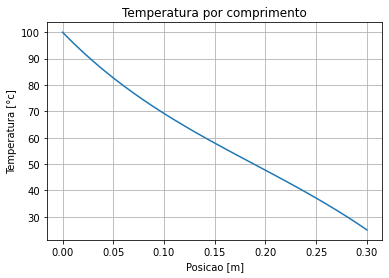

In [58]:
calcula_aleta(10)

# Comportamento analítico

In [59]:
def t_analitico(x):
    p = 2*math.pi*raio
    Atr = math.pi*raio**2
    m=math.sqrt((h*p)/(k*Atr))
    
    T = ((Tl/Tb)*np.sinh(m*x) + np.sinh(m*(Lx-x))) / np.sinh(m*Lx)
    return T

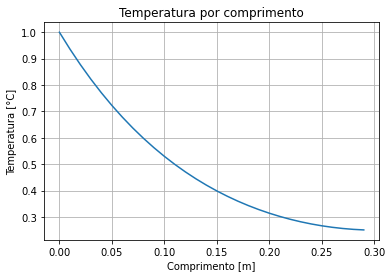

In [60]:
x = np.arange(0,Lx,dx)
T_list = []
for i in x:
    T = t_analitico(i)
    T_list.append(T)

plt.title("Temperatura por comprimento")
plt.plot(x, T_list)
plt.xlabel("Comprimento [m]")
plt.ylabel("Temperatura [°C]")
plt.grid(True)
plt.show()